<a href="https://colab.research.google.com/github/ataevbaktygul/parallelepipeds/blob/main/numpy_lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np

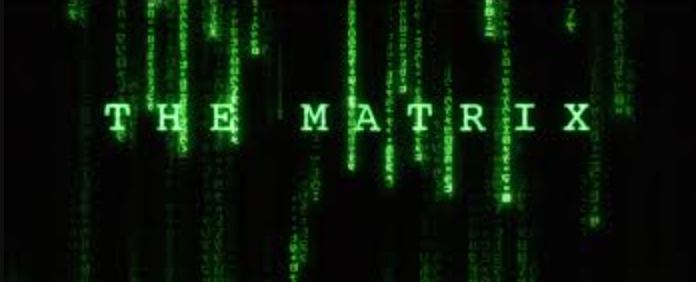

# List & np.array

Почему Numpy намного круче, чем Python List? Numpy очень хорошо адаптирован под работу с математическими вычислениями для массовов числовых данных. Давайте сравним массив `numpy` с питоновским `list`.

Создадим обычный лист и попробуем проделать с ним арифметические операции:

In [16]:
my_list = [1, 2, 3, 4, 5, 6, 7]

In [17]:
my_list + 3

TypeError: can only concatenate list (not "int") to list

Как видим, поэлементно прибавить число к списку не получается без использования итерации... В этом существенный минус списков.

In [18]:
my_list * 2

[1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7]

In [6]:
my_list_2 = [[1, 2, 3], [4, 5, 6]]
my_list_2

[[1, 2, 3], [4, 5, 6]]

In [ ]:
my_list_2 * 2

[[1, 2, 3], [4, 5, 6], [1, 2, 3], [4, 5, 6]]

Как видим, умножение в данном случае так же не имеет арифметического смысла. Оно кратно увеличивает размер массива.

Попробуем те же операции проделать с массивами `numpy`.

### Num functions with np.array

In [19]:
my_list_2 = [[1, 2, 3], [4, 5, 6]]
my_array = np.array(my_list_2) # create np.array from list!!!

In [20]:
my_array

array([[1, 2, 3],
       [4, 5, 6]])

In [21]:
my_array + 2 # К каждому элементу массива прибавилось число 2. Очень удобно и никаких циклов!

array([[3, 4, 5],
       [6, 7, 8]])

In [22]:
my_array * 2 # Это аналогично работает с любыми (Абсолютно любыми) математическими операциями.

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [23]:
np.log(my_array) # Возмем поэлементно логарифм

array([[0.        , 0.69314718, 1.09861229],
       [1.38629436, 1.60943791, 1.79175947]])

Такие специфические функции как логарифм не представлены в базовом питоне. Их можно импортировать из нампай. Вот пример некоторых функций:


```
np.log() # Натуральный логарифм (по основанию e)
np.exp() # Экспонента
np.pi # Число ПИ
np.sin() # Синус (аргумент в РАДИАНАХ)
np.arccos() # Арккосинус (Возвращает РАДИАНЫ)
np.dot() # Матричное произведение
np.linalg.det() # Определитель матрицы
np.sqrt() # Корень квадратный
np.e # Число Эйлера (e ~ 2.72)
```



Создадим массив со значениями катетов прямоугольного треугольника.
Вычислим значения гипотенузы и значения острого угла в градусах для каждого соответственно. Заметим, насколько легче становится производить данные расчеты по сравнению с использованием базового Python.

In [30]:
katets = np.random.randint(1, 10, (10, 2))
katets

array([[4, 6],
       [5, 9],
       [2, 3],
       [7, 9],
       [4, 9],
       [1, 2],
       [8, 8],
       [4, 8],
       [8, 5],
       [7, 8]])

In [31]:
gip = (katets**2).sum(axis=1)**.5
gip

array([ 7.21110255, 10.29563014,  3.60555128, 11.40175425,  9.8488578 ,
        2.23606798, 11.3137085 ,  8.94427191,  9.43398113, 10.63014581])

In [ ]:
angle = np.degrees(np.arctan(katets.min(axis=1)/katets.max(axis=1))).round(1)
angle

array([18.4, 23.2, 41.6, 11.3, 41.2, 12.5, 41.6, 45. , 26.6, 33.7])

# Create array

* `np.array()` - anything to array
* `np.zeros()` - array of '0'
* `np.ones()` - array of '1'
* `np.full()` - array of any other number
* `np.arange()` - array from a numeric set on a specified range

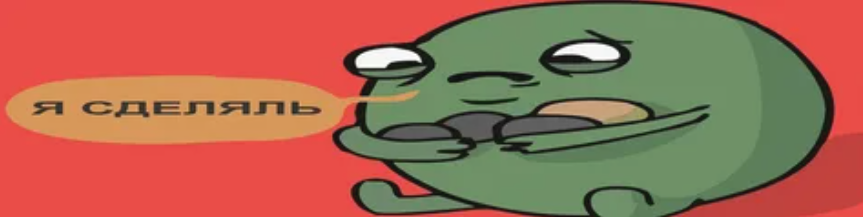

## `np.array(....., dtype = ...)`

Получает на вход почти любой тип упорядоченных данных, например `list` и возвращает `np.ndarray`.

* `dtype` - аргумент, который указывает на желаемый тип элементов массива. О типах данных в массиве мы поговорим далее.


In [ ]:
list_ = [1, 2, 3, 4]
arr = np.array(list_)
arr

array([1, 2, 3, 4])

In [ ]:
type(arr)

numpy.ndarray

In [ ]:
arr.dtype # проверка типа содержимого

dtype('int64')

In [ ]:
arr.astype(np.float16) # после изменения типа данных, массив не будет пересохранен

array([1., 2., 3., 4.], dtype=float16)

In [ ]:
arr = np.array(list_, dtype=float) # создание массива с предуказанным типом данных
arr

array([1., 2., 3., 4.])

In [ ]:
arr = np.array(list_, dtype=np.float32)
arr

array([1., 2., 3., 4.], dtype=float32)

In [ ]:
list_2 = [[1, 2], [3, 4]]
arr_2 = np.array(list_2)
arr_2

array([[1, 2],
       [3, 4]])

In [ ]:
np.array((1, 2, 3)) # работает даже с tuple

array([1, 2, 3])

## `np.zeros(shape: _ShapeLike, dtype: None = ...)`

Создает матрицу нулей любой формы и размерности.
* `shape` - параметр формы и размерности. Может принимать число для определения длины одномерного массива или кортеж вида $(n_{rows}, n_{columns})$ для создания матрицы.

Атрибут `shape` мы более подробно изучим далее.

In [ ]:
np.zeros(3)

array([0., 0., 0.])

In [ ]:
np.zeros((3, 5), dtype=int)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [ ]:
np.zeros((3, 3), dtype=int)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

## `np.ones(shape: _ShapeLike, dtype: None = ...)`

Аналогичен по функционалу с `zeros()`, только создает массив из единиц.

In [ ]:
x, y = np.ones(6), np.ones((2, 4), dtype=int)

In [ ]:
x

array([1., 1., 1., 1., 1., 1.])

In [ ]:
y

array([[1, 1, 1, 1],
       [1, 1, 1, 1]])

## `np.full(shape: _ShapeLike, fill_value: Any, dtype: None = ...,)`

Создает массив из указанного значения. В существенной мере функционал аналогичен предыдущим методам.

In [ ]:
np.full(5, 10)

array([10, 10, 10, 10, 10])

In [ ]:
np.full((5, 5), 10)

array([[10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10]])

## `np.arange(stop: _IntLike_co, /, *, dtype: None = ...)`

In [ ]:
np.arange(4)

array([0, 1, 2, 3])

In [ ]:
np.arange(2, 10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(2, 10, 2)

array([2, 4, 6, 8])

# `tolist()`

Метод, который превратит массив в питоновский list.

In [ ]:
np.arange(2, 10, 2).tolist()

[2, 4, 6, 8]

# SHAPE -> tuple -> RESHAPE

"Зри в презу"

Ключевым моментом является то, что

* shape возвращает кортеж с размерностью
* reshape() принимает на вход кортеж с размерностью
* Принцип FRTC - "First rows then columns"

In [ ]:
# ex_1
arr_1 = np.array([1, 2, 3, 4, 5, 6])
arr_1

array([1, 2, 3, 4, 5, 6])

In [ ]:
arr_1.shape

(6,)

In [ ]:
arr_1 = arr_1.reshape((2, 3))
arr_1

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr_1.shape

(2, 3)

In [ ]:
# ex_2
np.array([1, 2, 3]).reshape((2, 2))

ValueError: ignored

Why??????

# Slicing

In [ ]:
arr = np.arange(1, 26).reshape((5, 5))
arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [ ]:
arr[1]

array([ 6,  7,  8,  9, 10])

In [ ]:
arr[1, 3]

9

In [ ]:
arr[1:3, 2:4]

array([[ 8,  9],
       [13, 14]])

In [ ]:
arr[[1, 3], [2, 4]]

# Boolean

In [ ]:
arr = np.arange(1, 12)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Булева операция применительно к массиву возвращает булевый массив, где
* `True` будет соответствовать тем элементам массива, которые удовлетворяют условию.
* `False` для остальных.

In [ ]:
arr>5

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True])

In [ ]:
bool_arr = arr>5
bool_arr.dtype

dtype('bool')

In [ ]:
arr_2 = np.arange(1, 10).reshape((3, 3))
arr_2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
arr_2 %2 == 0

array([[False,  True, False],
       [ True, False,  True],
       [False,  True, False]])

# Зачем эти булевы массивы нужны?
Они выполняют очень важную роль для фильтрации данных.

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6])
mask = np.array([True, False, True, True, True, False])



```
arr[mask]
>>> [... ] # filtred arr
```



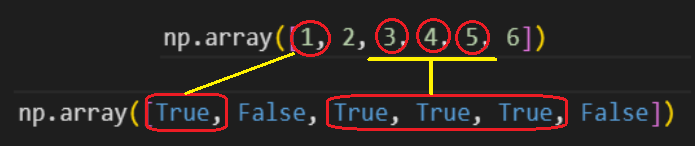

In [ ]:
arr[mask]

array([1, 3, 4, 5])

Использование булевых масок - мощнейший инструмент фильтрации!!


# Combination of masks and Inversion

При сочетании логических условий мы оперировали операторами `and`, `or` и `not`. Но при сочетании булевых масок мы используем аналоги:

* `and`:$\;\;\;\;\;$&
* `or`:$\;\;\;\;\;\;\;$|
* `not`:$\;\;\;\;$ ~

In [ ]:
mask_1 = np.array([[True, True, True], [False, False, False], [False, False, False]])
mask_2 = np.array([[False, False, False], [False, False, False], [True, True, True]])

In [ ]:
mask_1

array([[ True,  True,  True],
       [False, False, False],
       [False, False, False]])

In [ ]:
mask_2

array([[False, False, False],
       [False, False, False],
       [ True,  True,  True]])

In [ ]:
mask_1 & mask_2

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [ ]:
mask_1 | mask_2

array([[ True,  True,  True],
       [False, False, False],
       [ True,  True,  True]])

In [ ]:
~ mask_1

array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

Сoздадим массив и отберем из него все числа в диапозоне $(3, 10]$

In [ ]:
arr = np.arange(1, 26).reshape((5, 5))

In [ ]:
mask_1 = arr > 3
mask_2 = arr <= 10

In [ ]:
arr[mask_1 & mask_2]

array([ 4,  5,  6,  7,  8,  9, 10])